In [275]:
import pandas as pd
import numpy as np
import polars as pl

In [276]:
# reading in the raw csv data directly from the web
games_df = pd.read_csv("https://raw.githubusercontent.com/nflverse/nfldata/master/data/games.csv")
records_df = pd.read_csv("https://raw.githubusercontent.com/nflverse/nfldata/master/data/standings.csv", index_col="team")[["season","pct"]].groupby(["team"])["pct"].mean()

# reading in cloud saved csv as dataframe created in the get_weather.py file
weather_df = pd.read_csv(r'C:\Users\Mark\OneDrive - Atlantic TU\Documents\Data\weatherData.csv')

# mapping winning percentages from the records dataframe to the games dataframe
games_df["home_team_win_perecentage"] = games_df["home_team"].map(records_df)
games_df["away_team_win_perecentage"] = games_df["away_team"].map(records_df)

# remove all games form the games dataframe after the previous superbowl. It contains the next year's fixtures with no recorded statistics
games_df = games_df.loc[games_df['gameday']<='2024-03-01']

# creating a month number column as an integer 
games_df["month_number"] = pd.to_numeric(games_df['gameday'].str[5:7])

# mapping weather stations representing multiple teams to their respective teams using dictionaries 
phoenixList = ['ARI', 'LV', 'SD']
d1=dict.fromkeys(phoenixList, 'Phoenix')
columbusList = ['CIN', 'CLE', 'PIT']
d2=dict.fromkeys(columbusList, 'Columbus')
sacramentoList = ['LAR', 'LAC', 'LA', 'SF', 'OAK']
d3=dict.fromkeys(sacramentoList, 'Sacramento')
tallahasseeList = ['JAX', 'TB', 'MIA']
d4=dict.fromkeys(tallahasseeList, 'Tallahassee')
madisonList = ['GB','CHI']
d5=dict.fromkeys(madisonList, 'Madison')
topekaList = ['KC','STL']
d6=dict.fromkeys(topekaList, 'Topeka')
austinList = ['DAL','HOU']
d7=dict.fromkeys(austinList, 'Austin')
trentonList = ['PHI', 'NYJ', 'NYG']
d8=dict.fromkeys(trentonList, 'Trenton')

# creating large dict from preious step and mapping weather stations representing 1 team to their respective team
d = {**d1,**d2,**d3,**d4,**d5,**d6,**d7, **d8, \
     "CAR": "Columbia", "TEN": "Nashville", "BAL": "Annapolis", \
        "WAS": "Washington", "SEA": "Olympia", "DEN": "Denver", \
            "NE": "Providence", "IND": "Indianapolis", "MIN": "Saint Paul", \
                "DET": "Lansing", "BUF": "Albany", "ATL": "Atlanta", "NO": "Jackson"}
games_df['homeTeamNearestWeatherStation'] = games_df['home_team'].map(d)
games_df['awayTeamNearestWeatherStation'] = games_df['away_team'].map(d)

In [277]:
# getting the average temperature for each city and individual month during the football season (Sep-Feb)
weather_df['date']= pd.to_datetime(weather_df['date'])
january_weather_df = weather_df[weather_df['date'].dt.month == 1].groupby('city_name')['avg_temp_c'].mean()
february_weather_df = weather_df[weather_df['date'].dt.month == 2].groupby('city_name')['avg_temp_c'].mean()
september_weather_df = weather_df[weather_df['date'].dt.month == 9].groupby('city_name')['avg_temp_c'].mean()
october_weather_df = weather_df[weather_df['date'].dt.month == 10].groupby('city_name')['avg_temp_c'].mean()
november_weather_df = weather_df[weather_df['date'].dt.month == 11].groupby('city_name')['avg_temp_c'].mean()
december_weather_df = weather_df[weather_df['date'].dt.month == 12].groupby('city_name')['avg_temp_c'].mean()

# assigning acclimation temperature for current month for each team.
games_df['avgHomeTeamJanTemp'] = games_df['homeTeamNearestWeatherStation'].map(january_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamFebTemp'] = games_df['homeTeamNearestWeatherStation'].map(february_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamSepTemp'] = games_df['homeTeamNearestWeatherStation'].map(september_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamOctTemp'] = games_df['homeTeamNearestWeatherStation'].map(october_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamNovTemp'] = games_df['homeTeamNearestWeatherStation'].map(november_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamDecTemp'] = games_df['homeTeamNearestWeatherStation'].map(december_weather_df).apply(lambda x: (x * 1.8)+32)

games_df['avgAwayTeamJanTemp'] = games_df['awayTeamNearestWeatherStation'].map(january_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamFebTemp'] = games_df['awayTeamNearestWeatherStation'].map(february_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamSepTemp'] = games_df['awayTeamNearestWeatherStation'].map(september_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamOctTemp'] = games_df['awayTeamNearestWeatherStation'].map(october_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamNovTemp'] = games_df['awayTeamNearestWeatherStation'].map(november_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamDecTemp'] = games_df['awayTeamNearestWeatherStation'].map(december_weather_df).apply(lambda x: (x * 1.8)+32)

# assigning relevant temperature as the current acclimatised temperature. i.e. the team's acclimatised temperature in september is the team's average temperature for month 9
games_df.loc[games_df['month_number']== 1, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamJanTemp']
games_df.loc[games_df['month_number']== 2, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamFebTemp']
games_df.loc[games_df['month_number']== 9, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamSepTemp']
games_df.loc[games_df['month_number']== 10, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamOctTemp']
games_df.loc[games_df['month_number']== 11, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamNovTemp']
games_df.loc[games_df['month_number']== 12, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamDecTemp']

games_df.loc[games_df['month_number']== 1, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamJanTemp']
games_df.loc[games_df['month_number']== 2, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamFebTemp']
games_df.loc[games_df['month_number']== 9, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamSepTemp']
games_df.loc[games_df['month_number']== 10, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamOctTemp']
games_df.loc[games_df['month_number']== 11, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamNovTemp']
games_df.loc[games_df['month_number']== 12, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamDecTemp']

games_df[['home_team','away_team','month_number', 'homeAcclimatisedTemp', 'awayAcclimatisedTemp']]

,home_team,away_team,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp
0,ATL,MIN,9,73.707500,63.875000
1,CHI,KC,9,61.655000,67.895000
2,CLE,PIT,9,65.307826,65.307826
3,GB,OAK,9,61.655000,69.197391
4,IND,BUF,9,66.192500,63.560000
...,...,...,...,...,...
6701,DET,TB,1,23.502500,50.806400
6702,BUF,KC,1,21.214400,31.020800
6703,BAL,KC,1,33.915200,31.020800
6704,SF,DET,1,46.047200,23.502500


In [278]:
# how much closer the home team is acclimated to the gameday temperature than the away team. Number will be negative if away team is better acclimatised
games_df['home_acclimatisation_advantage'] = (games_df['homeAcclimatisedTemp'] - games_df['temp'])-(games_df['awayAcclimatisedTemp']-games_df['temp'])

# assigning acclimatisation category in groups of 10 degrees Fahrenheit
games_df.loc[((games_df['homeAcclimatisedTemp'] - games_df['temp']) < 50) & ((games_df['homeAcclimatisedTemp'] - games_df['temp']) > -50), 'home_acclimatisation_category'] = 5
games_df.loc[((games_df['homeAcclimatisedTemp'] - games_df['temp']) < 40) & ((games_df['homeAcclimatisedTemp'] - games_df['temp']) > -40), 'home_acclimatisation_category'] = 4
games_df.loc[((games_df['homeAcclimatisedTemp'] - games_df['temp']) < 30) & ((games_df['homeAcclimatisedTemp'] - games_df['temp']) > -30), 'home_acclimatisation_category'] = 3
games_df.loc[((games_df['homeAcclimatisedTemp'] - games_df['temp']) < 20) & ((games_df['homeAcclimatisedTemp'] - games_df['temp']) > -20), 'home_acclimatisation_category'] = 2
games_df.loc[((games_df['homeAcclimatisedTemp'] - games_df['temp']) < 10) & ((games_df['homeAcclimatisedTemp'] - games_df['temp']) > -10), 'home_acclimatisation_category'] = 1

games_df.loc[((games_df['awayAcclimatisedTemp'] - games_df['temp']) < 60) & ((games_df['awayAcclimatisedTemp'] - games_df['temp']) > -60), 'away_acclimatisation_category'] = 6
games_df.loc[((games_df['awayAcclimatisedTemp'] - games_df['temp']) < 50) & ((games_df['awayAcclimatisedTemp'] - games_df['temp']) > -50), 'away_acclimatisation_category'] = 5
games_df.loc[((games_df['awayAcclimatisedTemp'] - games_df['temp']) < 40) & ((games_df['awayAcclimatisedTemp'] - games_df['temp']) > -40), 'away_acclimatisation_category'] = 4
games_df.loc[((games_df['awayAcclimatisedTemp'] - games_df['temp']) < 30) & ((games_df['awayAcclimatisedTemp'] - games_df['temp']) > -30), 'away_acclimatisation_category'] = 3
games_df.loc[((games_df['awayAcclimatisedTemp'] - games_df['temp']) < 20) & ((games_df['awayAcclimatisedTemp'] - games_df['temp']) > -20), 'away_acclimatisation_category'] = 2
games_df.loc[((games_df['awayAcclimatisedTemp'] - games_df['temp']) < 10) & ((games_df['awayAcclimatisedTemp'] - games_df['temp']) > -10), 'away_acclimatisation_category'] = 1

# calculate difference in acclimatisation categories
games_df['acclimatisation_category_difference'] = games_df['away_acclimatisation_category'] - games_df['home_acclimatisation_category']

# set the current games dataframe to be the main dataframe as all merging is complete
df = games_df
df

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,avgAwayTeamSepTemp,avgAwayTeamOctTemp,avgAwayTeamNovTemp,avgAwayTeamDecTemp,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimatisation_advantage,home_acclimatisation_category,away_acclimatisation_category,acclimatisation_category_difference
0,1999_01_MIN_ATL,1999,REG,1,1999-09-12,Sunday,NaN,MIN,17.0,ATL,...,63.875000,47.5250,36.207500,22.1300,73.707500,63.875000,NaN,NaN,NaN,NaN
1,1999_01_KC_CHI,1999,REG,1,1999-09-12,Sunday,NaN,KC,17.0,CHI,...,67.895000,56.3150,44.670435,34.8350,61.655000,67.895000,-6.240000,2.0,2.0,0.0
2,1999_01_PIT_CLE,1999,REG,1,1999-09-12,Sunday,NaN,PIT,43.0,CLE,...,65.307826,57.0200,42.830000,36.4400,65.307826,65.307826,0.000000,2.0,2.0,0.0
3,1999_01_OAK_GB,1999,REG,1,1999-09-12,Sunday,NaN,OAK,24.0,GB,...,69.197391,65.0000,53.652500,46.8800,61.655000,69.197391,-7.542391,1.0,1.0,0.0
4,1999_01_BUF_IND,1999,REG,1,1999-09-12,Sunday,NaN,BUF,14.0,IND,...,63.560000,53.3750,41.337500,30.8975,66.192500,63.560000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6701,2023_20_TB_DET,2023,DIV,20,2024-01-21,Sunday,15:00,TB,23.0,DET,...,79.760000,70.2275,59.427500,56.9300,23.502500,50.806400,NaN,NaN,NaN,NaN
6702,2023_20_KC_BUF,2023,DIV,20,2024-01-21,Sunday,18:30,KC,27.0,BUF,...,67.895000,56.3150,44.670435,34.8350,21.214400,31.020800,-9.806400,1.0,1.0,0.0
6703,2023_21_KC_BAL,2023,CON,21,2024-01-28,Sunday,15:00,KC,17.0,BAL,...,67.895000,56.3150,44.670435,34.8350,33.915200,31.020800,2.894400,2.0,2.0,0.0
6704,2023_21_DET_SF,2023,CON,21,2024-01-28,Sunday,18:30,DET,31.0,SF,...,60.185000,51.5750,39.680000,30.9200,46.047200,23.502500,22.544700,3.0,5.0,2.0


In [279]:
# dropping irrelevant columns (including acclimatisation data for each month) and filling NA values with 0
df.drop(df.iloc[:, 0:7], axis=1, inplace=True)
df.drop(df.iloc[:, 8:15], axis=1, inplace=True)
df.drop(df.iloc[:, 23:32], axis=1, inplace=True)
df.drop(df.iloc[:, 26:40], axis=1, inplace=True)
df.drop(['surface'], axis=1, inplace=True)
df.fillna(0, inplace=True)
df.head(20)

,away_team,away_score,home_team,home_score,location,result,total,overtime,away_rest,home_rest,...,wind,home_team_win_perecentage,away_team_win_perecentage,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimatisation_advantage,home_acclimatisation_category,away_acclimatisation_category,acclimatisation_category_difference
0,MIN,17.0,ATL,14.0,Home,-3.0,31.0,0.0,7,7,...,0.0,0.503437,0.519981,9,73.707500,63.875000,0.000000,0.0,0.0,0.0
1,KC,17.0,CHI,20.0,Home,3.0,37.0,0.0,7,7,...,12.0,0.462116,0.570173,9,61.655000,67.895000,-6.240000,2.0,2.0,0.0
2,PIT,43.0,CLE,0.0,Home,-43.0,43.0,0.0,7,7,...,12.0,0.361333,0.627238,9,65.307826,65.307826,0.000000,2.0,2.0,0.0
3,OAK,24.0,GB,28.0,Home,4.0,52.0,0.0,7,7,...,10.0,0.614770,0.357639,9,61.655000,69.197391,-7.542391,1.0,1.0,0.0
4,BUF,14.0,IND,31.0,Home,17.0,45.0,0.0,7,7,...,0.0,0.601023,0.491049,9,66.192500,63.560000,0.000000,0.0,0.0,0.0
5,SF,3.0,JAX,41.0,Home,38.0,44.0,0.0,7,7,...,8.0,0.387948,0.482177,9,79.760000,69.197391,10.562609,1.0,1.0,0.0
6,CAR,10.0,NO,19.0,Home,9.0,29.0,0.0,7,7,...,0.0,0.569373,0.477382,9,70.212500,75.972500,0.000000,0.0,0.0,0.0
7,NE,30.0,NYJ,28.0,Home,-2.0,58.0,0.0,7,7,...,5.0,0.423753,0.697570,9,70.347500,66.837500,3.510000,1.0,1.0,0.0
8,ARI,25.0,PHI,24.0,Home,-1.0,49.0,0.0,7,7,...,3.0,0.578804,0.439898,9,70.347500,90.207500,-19.860000,1.0,2.0,1.0
9,DET,28.0,SEA,20.0,Home,-8.0,48.0,0.0,7,7,...,0.0,0.573450,0.379236,9,59.240000,60.185000,0.000000,0.0,0.0,0.0


In [280]:
# converting roof type into Boolean value to split values between indoor and outdoor games
roofMap = {"dome":1, "outdoors":0, "closed":1, "open":0}
df['roof']= df['roof'].map(roofMap)
df.rename(columns={"roof": "indoor_game"}, inplace=True)

# add Boolean value to track whether home team won the game and track winning margin
df['home_win'] = np.where(df['home_score'] > df['away_score'], 1, 0)
df.rename(columns={"result": "home_winning_margin"}, inplace=True)

# add Boolean value to track whether over bet won and track winning margin
df['over_totals_win'] = np.where(df['total'] > df['total_line'], 1, 0)
df['over_winning_margin'] = df.apply(lambda x: x['total'] - x['total_line'], axis=1)

# add Boolean value to track whether home team won against the spread and track winning margin
df['home_spread_win'] = np.where(df['home_winning_margin'] > df['spread_line'], 1, 0)
df['home_spread_winning_margin'] = df.apply(lambda x: x['home_winning_margin'] - x['spread_line'], axis=1)

In [281]:
# saving dataframe to csv file to be used for analysis of the spread market
df.to_csv('dataframe.csv')

In [282]:
# an example of a game after the steps of feature engineering
df1 = df.iloc[6460]
df1

away_team                                    LAC
away_score                                  28.0
home_team                                    MIN
home_score                                  24.0
location                                    Home
home_winning_margin                         -4.0
total                                       52.0
overtime                                     0.0
away_rest                                      7
home_rest                                     10
away_moneyline                            -110.0
home_moneyline                            -110.0
spread_line                                  1.0
away_spread_odds                          -115.0
home_spread_odds                          -105.0
total_line                                  54.0
under_odds                                -110.0
over_odds                                 -110.0
div_game                                       0
indoor_game                                    1
temp                

In [283]:
# showing numerical data
df.describe(include=[np.number])

,away_score,home_score,home_winning_margin,total,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,awayAcclimatisedTemp,home_acclimatisation_advantage,home_acclimatisation_category,away_acclimatisation_category,acclimatisation_category_difference,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
count,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,...,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000
mean,20.873993,23.234566,2.360573,44.108559,0.061288,7.472413,7.522070,59.315240,-92.468983,2.313451,...,53.143450,-0.193075,1.063823,1.342827,0.279004,0.565016,0.483895,0.649866,0.474650,0.047122
std,10.065753,10.316932,14.616551,14.208215,0.239876,1.976951,2.098159,244.880739,281.343748,5.962331,...,14.482275,9.967743,0.882904,1.195245,0.795680,0.495792,0.499778,13.463998,0.499394,13.263428
min,0.000000,0.000000,-49.000000,3.000000,0.000000,4.000000,4.000000,-1500.000000,-5000.000000,-19.000000,...,17.225600,-36.007200,0.000000,0.000000,-3.000000,0.000000,0.000000,-39.500000,0.000000,-52.000000
25%,14.000000,16.000000,-7.000000,34.000000,0.000000,7.000000,7.000000,-104.000000,-210.000000,-3.000000,...,42.582500,-4.383499,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,-8.500000
50%,20.000000,23.000000,3.000000,43.000000,0.000000,7.000000,7.000000,0.000000,0.000000,3.000000,...,53.652500,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-0.500000,0.000000,0.000000
75%,27.000000,30.000000,11.000000,53.000000,0.000000,7.000000,7.000000,187.750000,0.000000,6.500000,...,64.737500,4.042500,2.000000,2.000000,1.000000,1.000000,1.000000,9.000000,1.000000,8.000000
max,59.000000,70.000000,59.000000,106.000000,1.000000,21.000000,16.000000,2173.000000,1100.000000,27.000000,...,90.207500,35.184000,5.000000,6.000000,3.000000,1.000000,1.000000,68.500000,1.000000,49.500000


In [284]:
# showing categorical data
df.describe(include=[object]) 

,away_team,home_team,location
count,6706,6706,6706
unique,35,35,2
top,BAL,NE,Home
freq,222,231,6627


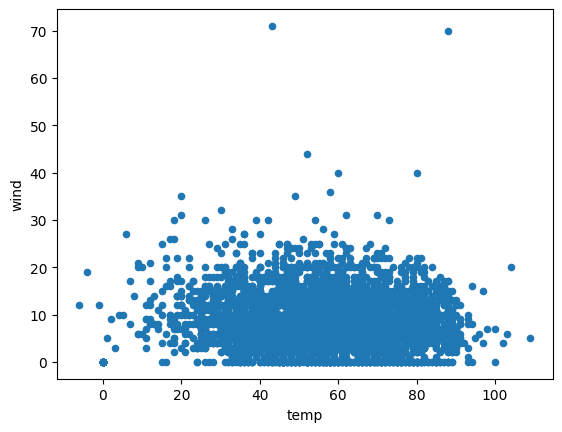

In [285]:
import matplotlib.pyplot as plt
df.plot(kind= 'scatter', x='temp', y='wind')

plt.show()

In [286]:
# splitting games into indoor and outdoor dataframes
indoor_df = df[df['indoor_game'] == 1]
indoor_df

,away_team,away_score,home_team,home_score,location,home_winning_margin,total,overtime,away_rest,home_rest,...,awayAcclimatisedTemp,home_acclimatisation_advantage,home_acclimatisation_category,away_acclimatisation_category,acclimatisation_category_difference,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
0,MIN,17.0,ATL,14.0,Home,-3.0,31.0,0.0,7,7,...,63.8750,0.0,0.0,0.0,0.0,0,0,-18.0,1,1.0
4,BUF,14.0,IND,31.0,Home,17.0,45.0,0.0,7,7,...,63.5600,0.0,0.0,0.0,0.0,1,0,-0.5,1,20.0
6,CAR,10.0,NO,19.0,Home,9.0,29.0,0.0,7,7,...,75.9725,0.0,0.0,0.0,0.0,1,0,-9.0,1,5.5
9,DET,28.0,SEA,20.0,Home,-8.0,48.0,0.0,7,7,...,60.1850,0.0,0.0,0.0,0.0,0,1,6.0,0,-17.5
10,BAL,10.0,STL,27.0,Home,17.0,37.0,0.0,7,7,...,69.2600,0.0,0.0,0.0,0.0,1,0,-2.0,1,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,CLE,14.0,HOU,45.0,Home,31.0,59.0,0.0,6,7,...,28.5440,0.0,0.0,0.0,0.0,1,1,14.0,1,33.5
6695,GB,48.0,DAL,32.0,Home,-16.0,80.0,0.0,7,7,...,21.0200,0.0,0.0,0.0,0.0,0,1,27.5,0,-23.0
6696,LA,23.0,DET,24.0,Home,1.0,47.0,0.0,7,7,...,46.0472,0.0,0.0,0.0,0.0,1,0,-5.5,0,-2.5
6701,TB,23.0,DET,31.0,Home,8.0,54.0,0.0,6,7,...,50.8064,0.0,0.0,0.0,0.0,1,1,4.5,1,2.0


In [287]:
outdoor_df = df[df['indoor_game'] == 0]
outdoor_df

,away_team,away_score,home_team,home_score,location,home_winning_margin,total,overtime,away_rest,home_rest,...,awayAcclimatisedTemp,home_acclimatisation_advantage,home_acclimatisation_category,away_acclimatisation_category,acclimatisation_category_difference,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
1,KC,17.0,CHI,20.0,Home,3.0,37.0,0.0,7,7,...,67.895000,-6.240000,2.0,2.0,0.0,1,0,-1.0,1,6.0
2,PIT,43.0,CLE,0.0,Home,-43.0,43.0,0.0,7,7,...,65.307826,0.000000,2.0,2.0,0.0,0,1,6.0,0,-37.0
3,OAK,24.0,GB,28.0,Home,4.0,52.0,0.0,7,7,...,69.197391,-7.542391,1.0,1.0,0.0,1,1,9.0,0,-5.0
5,SF,3.0,JAX,41.0,Home,38.0,44.0,0.0,7,7,...,69.197391,10.562609,1.0,1.0,0.0,1,0,-5.0,1,32.5
7,NE,30.0,NYJ,28.0,Home,-2.0,58.0,0.0,7,7,...,66.837500,3.510000,1.0,1.0,0.0,0,1,13.5,0,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,HOU,10.0,BAL,34.0,Home,24.0,44.0,0.0,7,14,...,51.648800,-17.733600,1.0,3.0,2.0,1,0,0.0,1,14.0
6700,GB,21.0,SF,24.0,Home,3.0,45.0,0.0,6,13,...,21.020000,25.027200,2.0,4.0,2.0,1,0,-5.5,0,-7.5
6702,KC,27.0,BUF,24.0,Home,-3.0,51.0,0.0,8,6,...,31.020800,-9.806400,1.0,1.0,0.0,0,1,5.5,0,-5.5
6703,KC,17.0,BAL,10.0,Home,-7.0,27.0,0.0,7,8,...,31.020800,2.894400,2.0,2.0,0.0,0,0,-17.0,0,-11.5


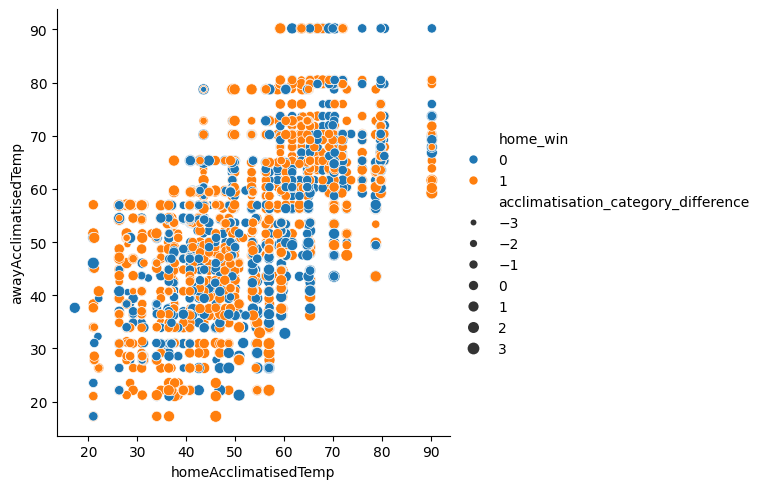

In [288]:
import seaborn as sns
# distibution of acclimatised temperatures
sns.relplot(
    data=outdoor_df,
    x="homeAcclimatisedTemp", y="awayAcclimatisedTemp", hue="home_win", size="acclimatisation_category_difference",
)

<Axes: xlabel='count', ylabel='total_line'>

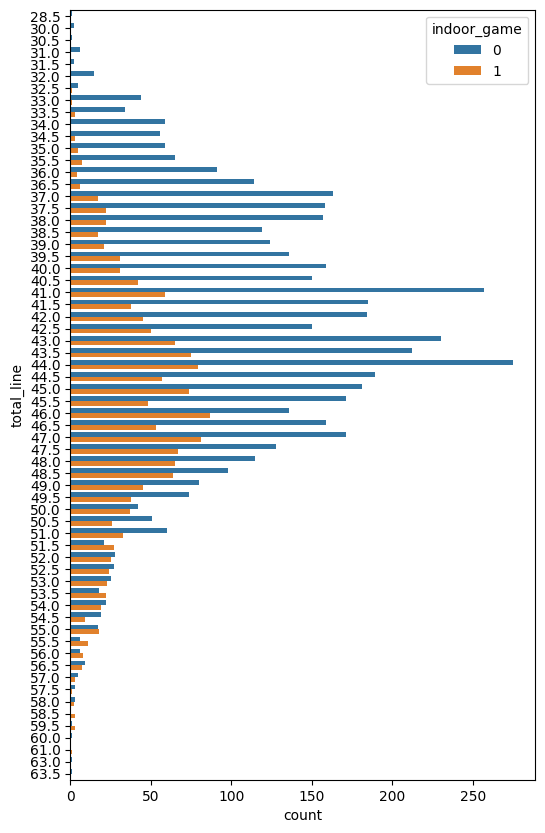

In [289]:
# distibution of total_line
fig, ax = plt.subplots(figsize=(6, 10))
sns.countplot(
    data=df,
    y="total_line",
    hue="indoor_game",
    ax=ax,
    #stat="percent",
)

<Axes: xlabel='count', ylabel='spread_line'>

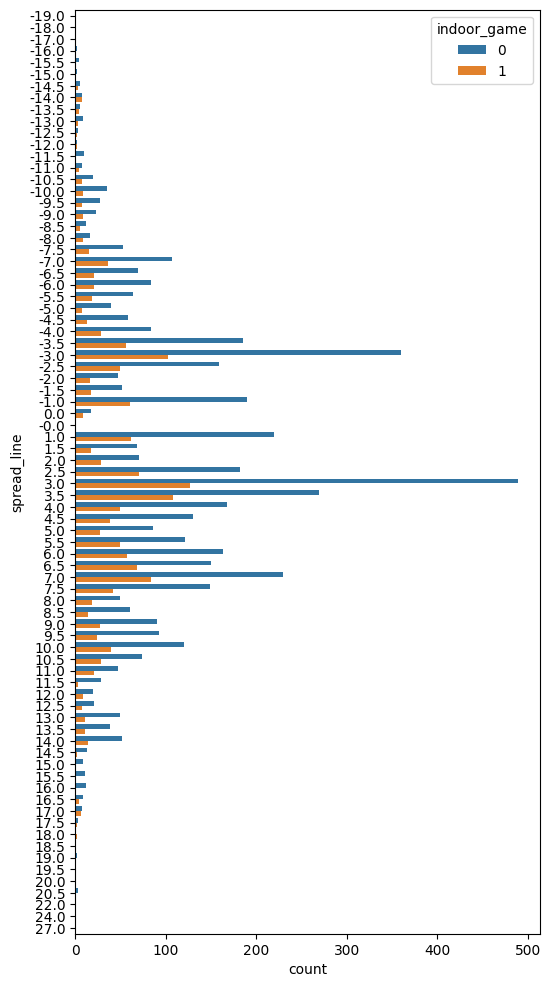

In [290]:
# distibution of spread_line
fig, ax = plt.subplots(figsize=(6, 12))
sns.countplot(
    data=df,
    y="spread_line",
    hue="indoor_game",
    ax=ax,
    #stat="percent",
)

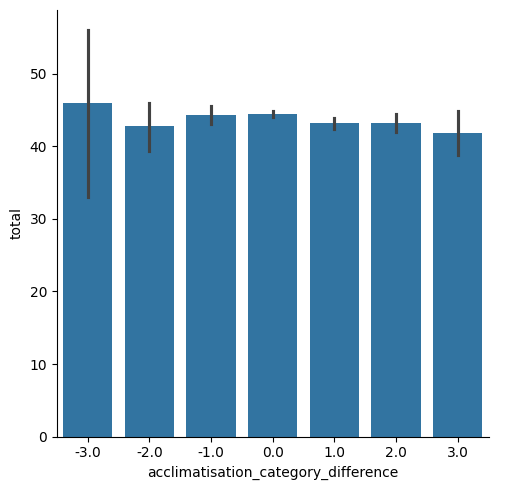

In [291]:
# categorical plot of differences in acclimatisation
sns.catplot(data=df, kind="bar", x="acclimatisation_category_difference", y="total")#, hue="home_win")

<Axes: xlabel='acclimatisation_category_difference', ylabel='percent'>

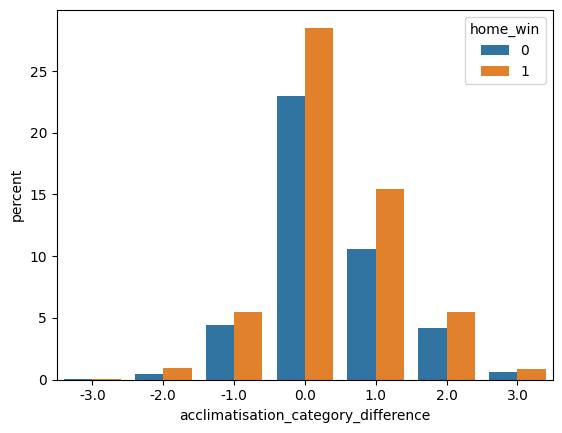

In [292]:
# percentages of differences in acclimatisation and home/away win split
sns.countplot(data=outdoor_df, x="acclimatisation_category_difference", hue="home_win", stat="percent")

<Axes: xlabel='home_acclimatisation_category', ylabel='Percent'>

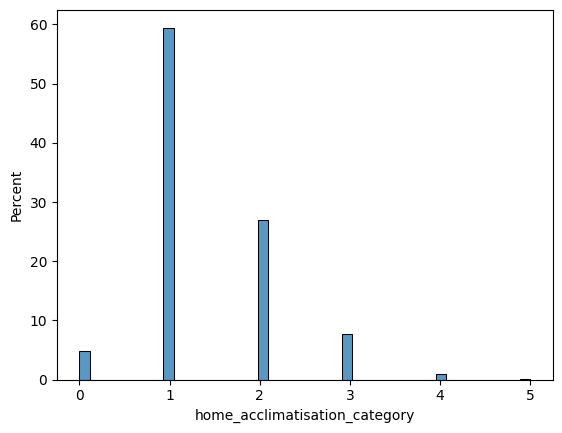

In [293]:
# histogram of percentages showing home team accmilatsation
sns.histplot(data=outdoor_df, x="home_acclimatisation_category", stat="percent")

<Axes: xlabel='away_acclimatisation_category', ylabel='Percent'>

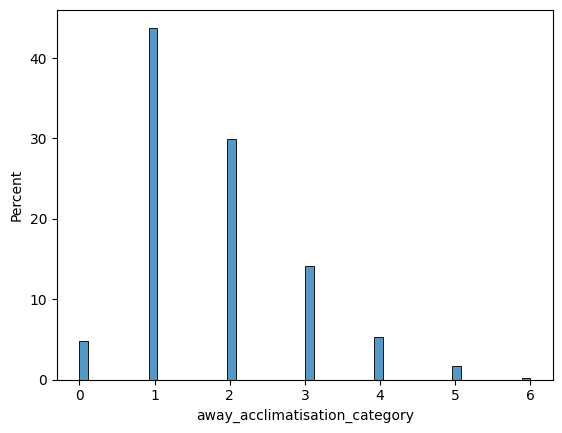

In [294]:
# histogram of percentages showing away team accmilatsation
sns.histplot(data=outdoor_df, x="away_acclimatisation_category", stat="percent")

<Axes: xlabel='div_game', ylabel='count'>

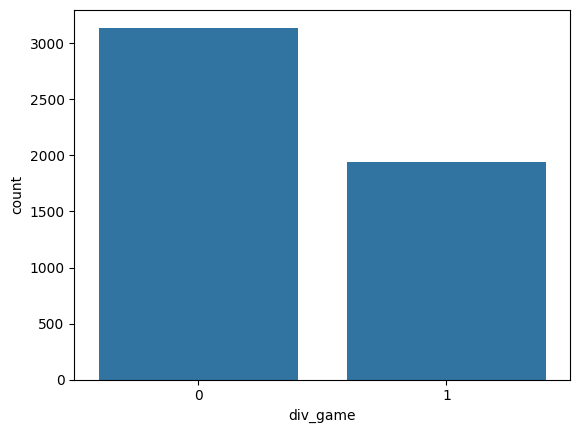

In [295]:
# count of divisional/non-divisioinal games
sns.countplot(data=outdoor_df, x="div_game")#, hue="home_win")

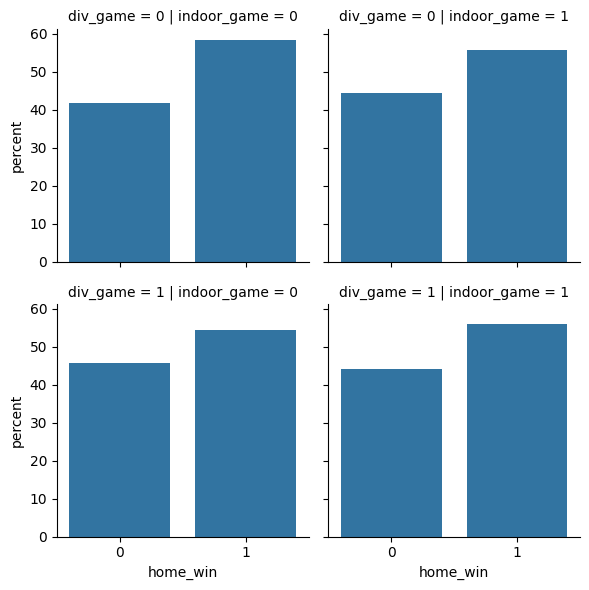

In [296]:
# grid showing home_win precentage based on whether the game is divisional and/or indoors
graph= sns.FacetGrid(data=df, col="indoor_game", row="div_game")

graph.map_dataframe(sns.countplot, x="home_win", stat="percent")

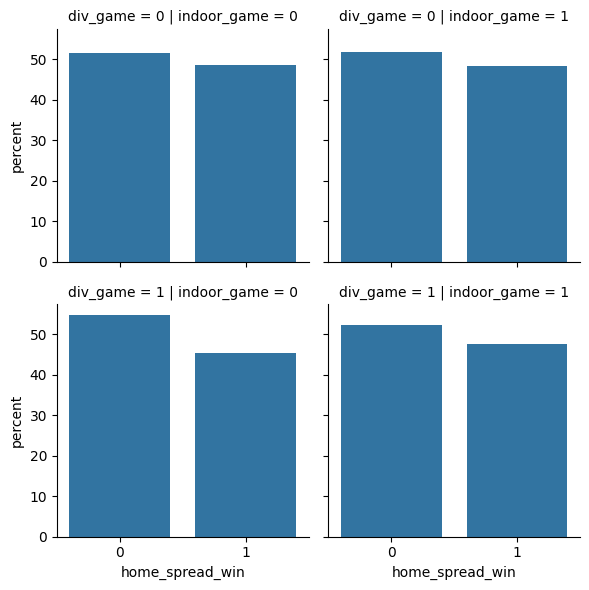

In [297]:
# grid showing home_spread_win precentage based on whether the game is divisional and/or indoors
graph= sns.FacetGrid(data=df, col="indoor_game", row="div_game")

graph.map_dataframe(sns.countplot, x="home_spread_win", stat="percent")

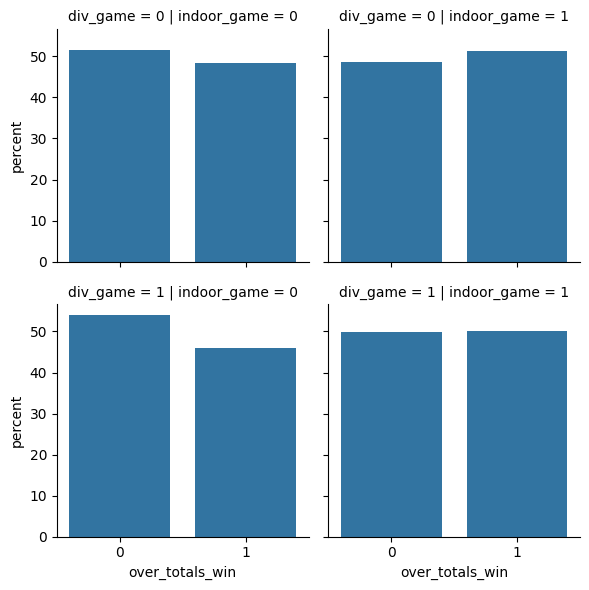

In [298]:
# grid showing over_totals_win precentage based on whether the game is divisional and/or indoors
graph= sns.FacetGrid(data=df, col="indoor_game", row="div_game")

graph.map_dataframe(sns.countplot, x="over_totals_win", stat="percent")

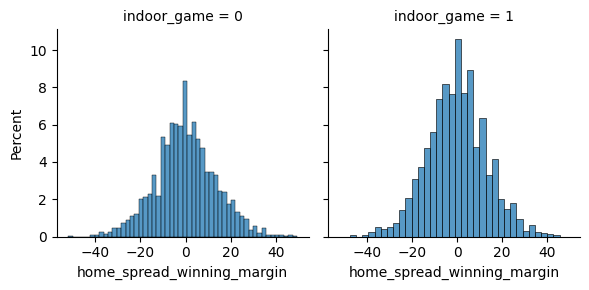

In [299]:
# histograms comparing the home spread winning margin for indoor and outdoor games
graph= sns.FacetGrid(data=df, col="indoor_game")

graph.map_dataframe(sns.histplot, x="home_spread_winning_margin", stat="percent")

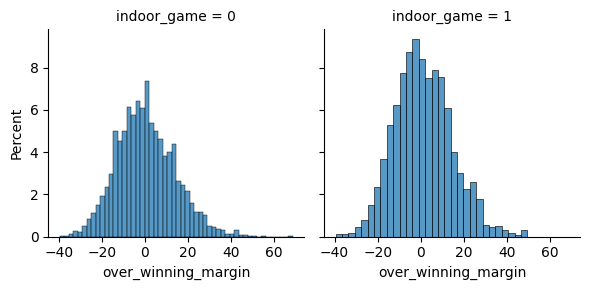

In [300]:
# histograms comparing the over bet winning margin for indoor and outdoor games
graph= sns.FacetGrid(data=df, col="indoor_game")

graph.map_dataframe(sns.histplot, x="over_winning_margin", stat="percent")

In [301]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
scaler = StandardScaler()

In [302]:
# converting categorical data to numerical values
indoor_df['home_team'] = label_encoder.fit_transform(indoor_df['home_team'])
indoor_df['away_team'] = label_encoder.fit_transform(indoor_df['away_team'])
indoor_df['location'] = label_encoder.fit_transform(indoor_df['location'])

C:\Users\Mark\AppData\Local\Temp\ipykernel_12780\3837186021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df['home_team'] = label_encoder.fit_transform(indoor_df['home_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_12780\3837186021.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df['away_team'] = label_encoder.fit_transform(indoor_df['away_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_12780\3837186021.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [303]:
# converting categorical data to numerical values
outdoor_df['home_team'] = label_encoder.fit_transform(outdoor_df['home_team'])
outdoor_df['away_team'] = label_encoder.fit_transform(outdoor_df['away_team'])
#df['surface'] = label_encoder.fit_transform(df['surface'])
outdoor_df['location'] = label_encoder.fit_transform(outdoor_df['location'])

C:\Users\Mark\AppData\Local\Temp\ipykernel_12780\1844618382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df['home_team'] = label_encoder.fit_transform(outdoor_df['home_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_12780\1844618382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df['away_team'] = label_encoder.fit_transform(outdoor_df['away_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_12780\1844618382.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [304]:
# scaling data for model creation

# removed temp and wind columns as they are irrelant for indoor games
indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number']] = \
    scaler.fit_transform(indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number']])

C:\Users\Mark\AppData\Local\Temp\ipykernel_12780\3871183293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number']] = \


In [305]:
# scaling data for model creation
outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimatisation_advantage','home_acclimatisation_category','away_acclimatisation_category','acclimatisation_category_difference']] = \
    scaler.fit_transform(outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimatisation_advantage','home_acclimatisation_category','away_acclimatisation_category','acclimatisation_category_difference']])

C:\Users\Mark\AppData\Local\Temp\ipykernel_12780\691240978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimatisation_advantage','home_acclimatisation_category','away_acclimatisation_category','acclimatisation_category_difference']] = \


In [306]:
from sklearn.model_selection import train_test_split

# splitting data into x and y for both testing and training and dropping irrelevant columns, target column and any column that mathematically gives away the target column value
indoor_X_train, indoor_X_test, indoor_y_train, indoor_y_test = train_test_split(indoor_df.drop(['over_totals_win','away_score','home_score','total','over_winning_margin', 'temp', 'wind', 'indoor_game'], axis=1), indoor_df['over_totals_win'], test_size=0.2)

In [307]:
from sklearn.model_selection import train_test_split

# splitting data into x and y for both testing and training and dropping irrelevant columns, target column and any column that mathematically gives away the target column value
outdoor_with_acclimatisation_X_train, outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_train, outdoor_with_acclimatisation_y_test = train_test_split(outdoor_df.drop(['over_totals_win','away_score','home_score','total','over_winning_margin', 'indoor_game'], axis=1), outdoor_df['over_totals_win'], test_size=0.2)
outdoor_without_acclimatisation_X_train, outdoor_without_acclimatisation_X_test, outdoor_without_acclimatisation_y_train, outdoor_without_acclimatisation_y_test = train_test_split(outdoor_df.drop(['over_totals_win','away_score','home_score','total','over_winning_margin', 'indoor_game','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimatisation_advantage','home_acclimatisation_category','away_acclimatisation_category','acclimatisation_category_difference'], axis=1), outdoor_df['over_totals_win'], test_size=0.2)

In [308]:
indoor_X_train

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimatisation_advantage,home_acclimatisation_category,away_acclimatisation_category,acclimatisation_category_difference,home_win,home_spread_win,home_spread_winning_margin
3226,27,8,0,-0.366211,-0.264164,-0.214139,-0.224350,-2.665399,2.160658,-2.164651,...,-0.268965,66.192500,65.307826,0.0,0.0,0.0,0.0,-1.123936,1.039551,0.583631
1976,3,8,0,-0.085969,-0.264164,-0.214139,-0.224350,2.075059,-1.966382,1.618302,...,0.424244,42.350000,41.337500,0.0,0.0,0.0,0.0,0.889731,-0.961954,-0.828191
2740,13,20,0,-2.678204,-0.264164,3.295700,-0.224350,-4.386562,3.105582,-2.753110,...,0.077639,56.315000,56.307500,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-1.667652
2281,29,20,0,-0.506332,-0.264164,-0.214139,-0.224350,-0.989856,0.980437,-0.903667,...,0.424244,44.670435,44.639130,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-0.141358
3941,9,7,0,-1.837479,-0.264164,1.290078,-0.224350,-1.981081,1.690063,-1.912454,...,0.770849,54.230000,29.156000,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-1.133449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,3,20,0,-1.347056,-0.264164,-0.214139,-0.224350,-0.239180,0.341772,-1.828388,...,-0.268965,67.895000,63.560000,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-0.637404
3047,6,8,0,0.264332,-0.264164,-0.715544,-0.224350,0.855729,-0.778691,0.693580,...,0.424244,42.350000,42.830000,0.0,0.0,0.0,0.0,0.889731,-0.961954,-0.026886
6586,34,4,0,2.296084,-0.264164,-1.718355,-1.635587,2.041880,-2.646130,1.786433,...,0.424244,59.712174,50.000000,0.0,0.0,0.0,0.0,0.889731,1.039551,1.690194
2797,29,13,0,1.665540,-0.264164,-0.214139,-0.224350,1.419773,-1.376272,1.366105,...,0.424244,36.207500,44.639130,0.0,0.0,0.0,0.0,0.889731,1.039551,1.194149


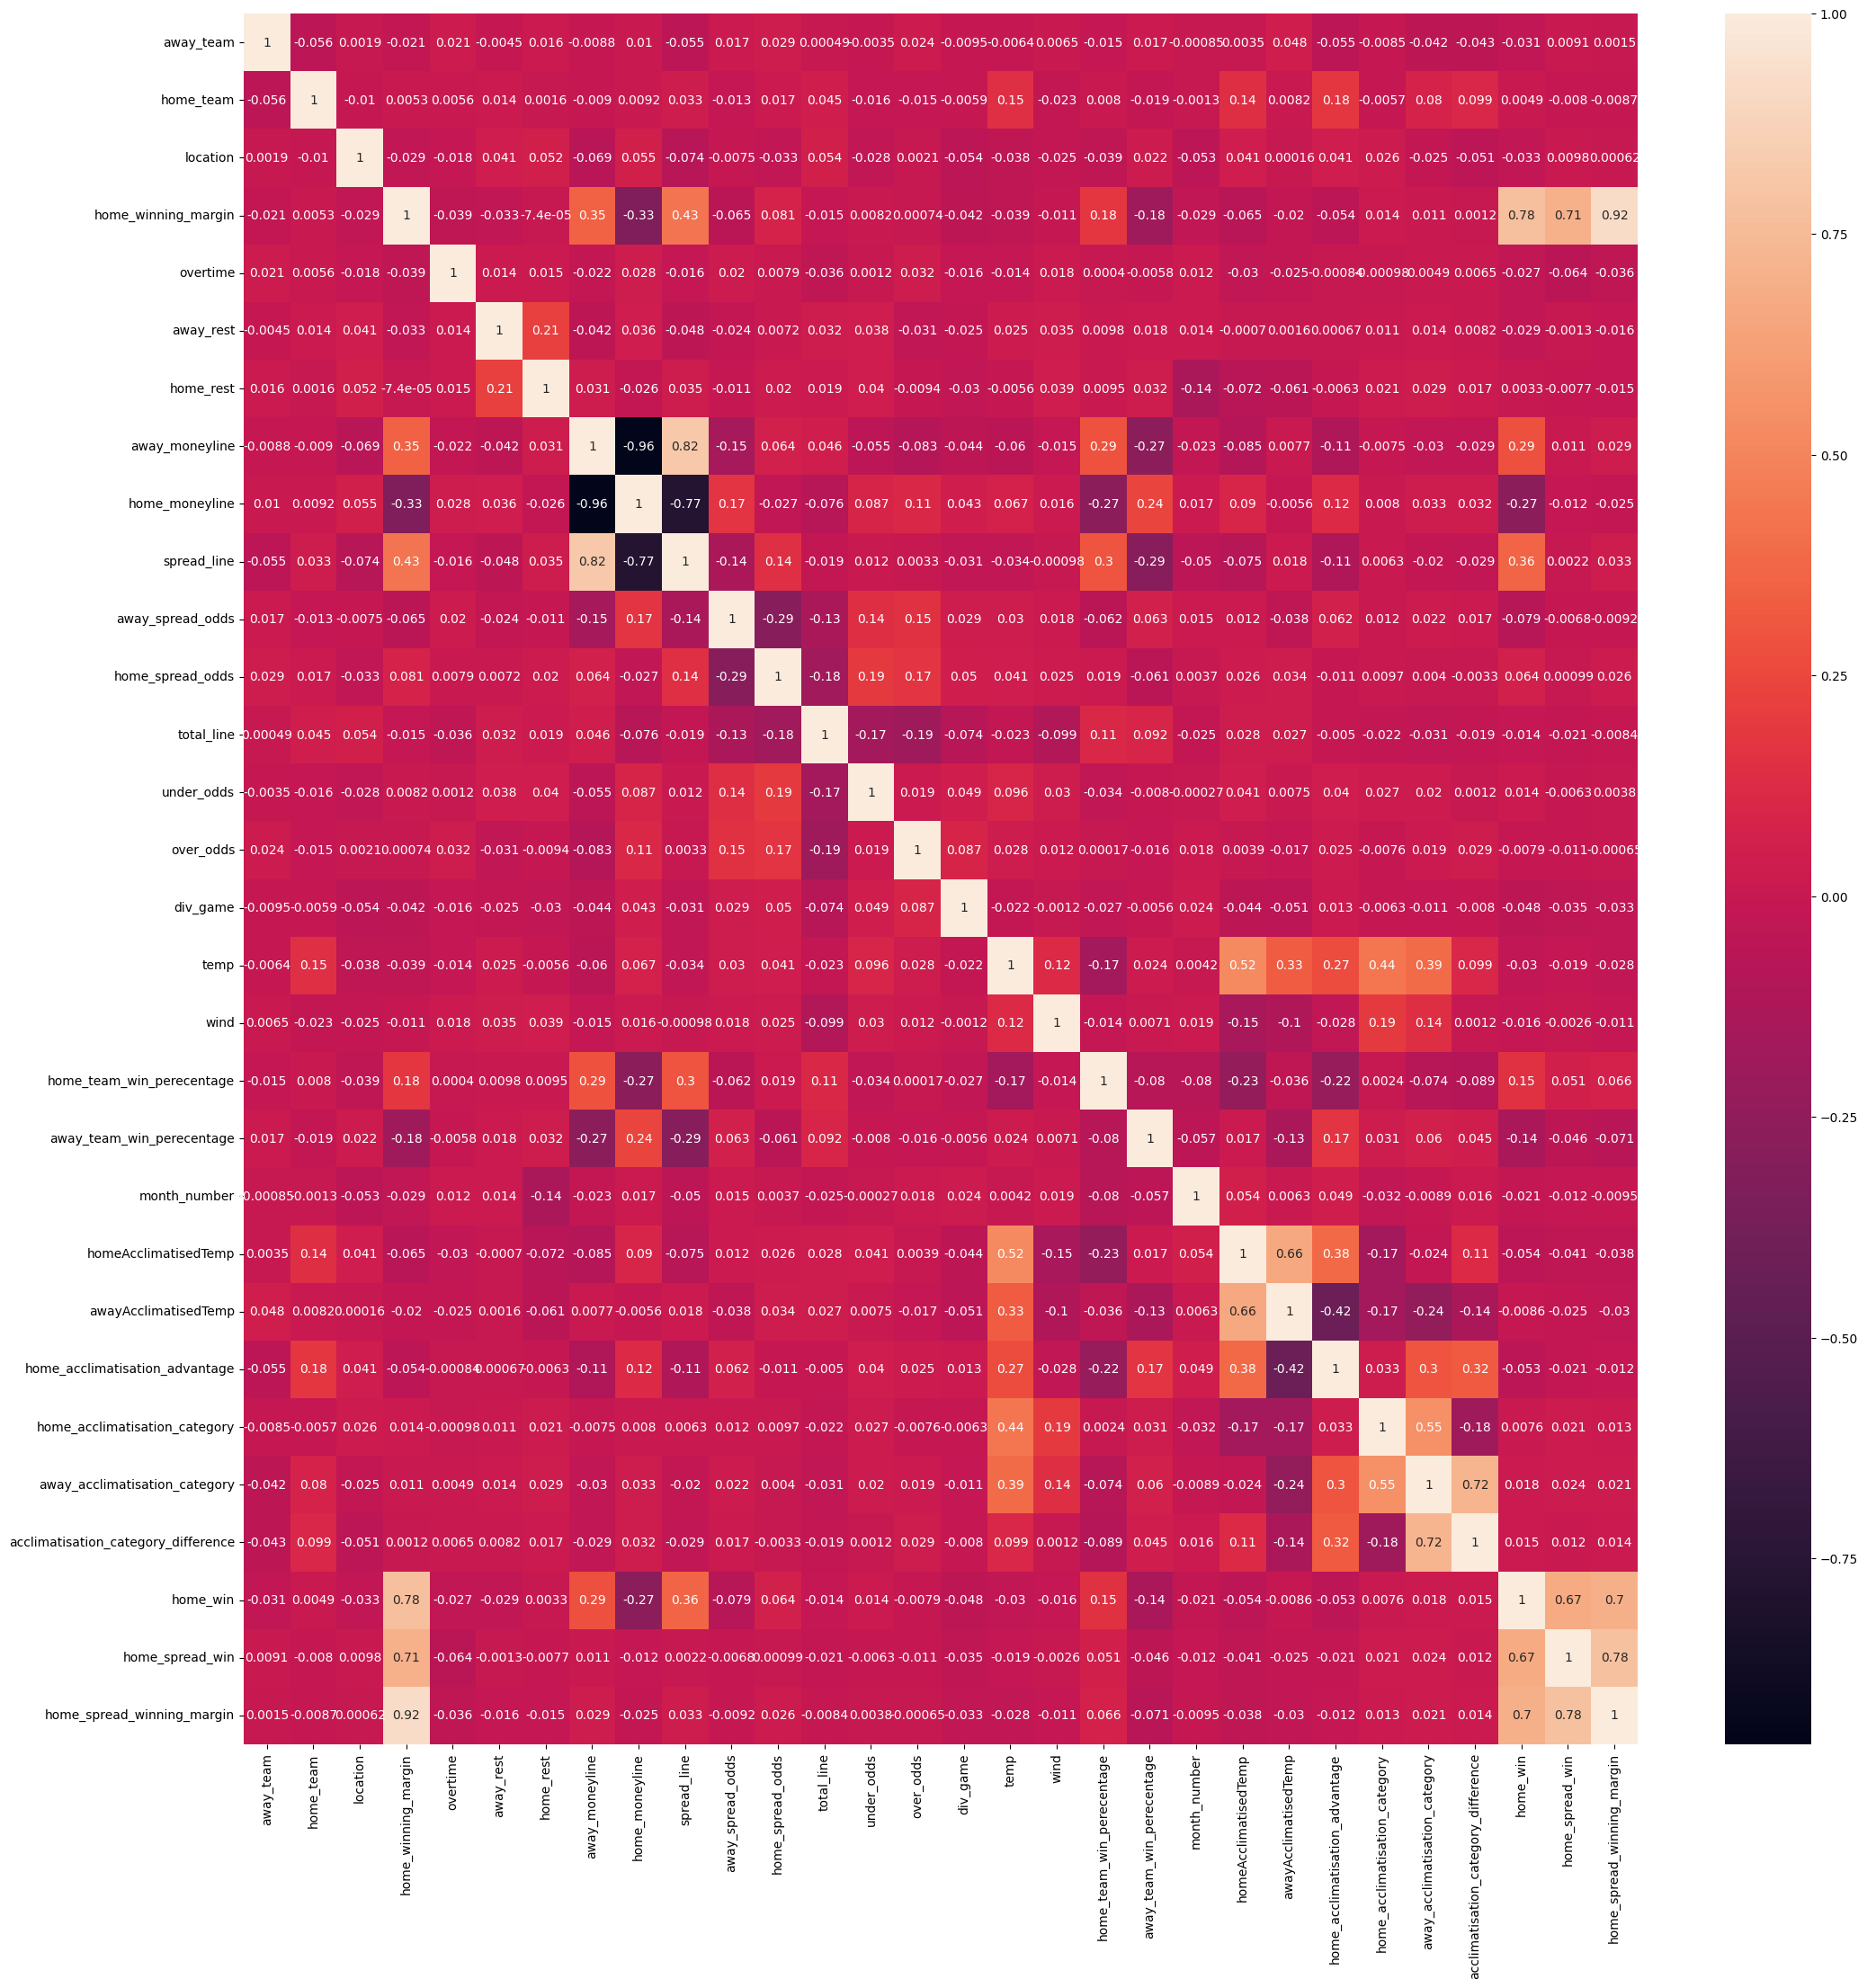

In [309]:
import seaborn as sn

# correlation matrix to show relationship between values
corr_matrix = outdoor_with_acclimatisation_X_train.corr()

plt.figure(figsize=(25,25))
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [310]:
indoor_y_train

3226    1
1976    0
2740    1
2281    0
3941    0
       ..
2435    1
3047    0
6586    1
2797    0
6378    0
Name: over_totals_win, Length: 1300, dtype: int32

In [311]:
indoor_X_test

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimatisation_advantage,home_acclimatisation_category,away_acclimatisation_category,acclimatisation_category_difference,home_win,home_spread_win,home_spread_winning_margin
3673,22,4,0,-0.366211,3.785524,-0.214139,-0.224350,0.304127,-0.199785,-0.231142,...,0.770849,54.230000,44.826957,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-0.293988
5965,16,7,0,-1.276996,-0.264164,-0.214139,-0.224350,-4.428036,3.045824,-3.257504,...,0.077639,72.820870,65.000000,0.0,0.0,0.0,0.0,-1.123936,1.039551,0.087586
3832,11,13,0,-1.066815,-0.264164,-0.214139,-0.694763,-1.504132,1.346455,-1.576192,...,0.077639,47.525000,49.437500,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-0.446617
4138,10,0,0,0.404453,-0.264164,-0.214139,-0.224350,-0.716129,0.730200,-0.567404,...,0.424244,65.337500,39.680000,0.0,0.0,0.0,0.0,0.889731,1.039551,0.698103
3711,30,1,0,-0.436271,-0.264164,0.287267,-0.224350,-1.010593,0.965497,-0.987732,...,-3.041804,45.089600,46.047200,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-0.026886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,31,13,0,0.824816,-0.264164,-0.214139,-0.224350,-0.239180,0.341772,0.777646,...,0.770849,22.130000,34.835000,0.0,0.0,0.0,0.0,0.889731,1.039551,0.545474
4450,10,20,0,0.334393,-0.264164,1.290078,-0.224350,-0.882024,0.864655,-0.903667,...,0.770849,34.835000,30.920000,0.0,0.0,0.0,0.0,0.889731,1.039551,0.774418
218,8,15,0,0.334393,-0.264164,-1.216950,-1.165175,-0.239180,0.341772,-1.828388,...,0.770849,44.826957,54.230000,0.0,0.0,0.0,0.0,0.889731,1.039551,1.194149
3489,26,0,0,1.315238,-0.264164,-0.214139,-0.224350,-0.973267,0.935618,-0.903667,...,-0.268965,90.207500,70.347500,0.0,0.0,0.0,0.0,0.889731,1.039551,1.842824


In [312]:
indoor_y_test

3673    1
5965    1
3832    1
4138    0
3711    1
       ..
1774    0
4450    0
218     1
3489    0
1672    0
Name: over_totals_win, Length: 325, dtype: int32

In [313]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression indoor_model and printing score
indoor_model = LogisticRegression(max_iter=1000)
indoor_model.fit(indoor_X_train, indoor_y_train)
print(indoor_model.score(indoor_X_test, indoor_y_test)) 

0.5076923076923077


In [314]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression acclimatised model and printing score
outdoor_with_acclimatisation_model = LogisticRegression(max_iter=4000)
outdoor_with_acclimatisation_model.fit(outdoor_with_acclimatisation_X_train, outdoor_with_acclimatisation_y_train)
print(outdoor_with_acclimatisation_model.score(outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_test)) 

outdoor_with_acclimatisation_X_train

0.5398230088495575


,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimatisation_advantage,home_acclimatisation_category,away_acclimatisation_category,acclimatisation_category_difference,home_win,home_spread_win,home_spread_winning_margin
6175,2,19,0,-0.910367,-0.252707,-0.247047,-0.256846,-0.824403,0.776724,-0.803490,...,-0.330341,0.969496,1.114664,0.022256,-1.891560,-1.671601,-0.411030,-1.144813,-0.946891,-0.646731
272,33,3,0,0.040531,-0.252707,-0.247047,-0.256846,-0.243212,0.324929,-0.216859,...,-0.330341,0.737987,1.292323,-0.698940,-0.544347,-0.728413,-0.411030,0.873505,1.056087,0.142018
214,21,24,0,0.855586,-0.252707,-0.247047,-0.256846,-0.243212,0.324929,-0.971099,...,0.776823,-0.873036,-1.127167,0.351084,-0.544347,-0.728413,-0.411030,0.873505,1.056087,1.381480
1787,15,21,0,0.515980,-0.252707,-0.754423,-0.735583,-0.243212,0.324929,0.118359,...,0.776823,-0.873036,-1.276692,0.539080,-0.544347,-0.728413,-0.411030,0.873505,1.056087,0.517612
5007,20,10,0,-1.249973,-0.252707,-0.754423,-0.735583,-1.868922,1.536719,-1.809143,...,0.776823,-1.892838,-2.159254,0.387766,0.802866,0.214774,-0.411030,-1.144813,-0.946891,-0.571612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6067,33,25,0,0.244295,-0.252707,-0.247047,1.179364,0.199794,-0.098848,-0.216859,...,0.776823,-1.177652,-0.661921,-0.610510,-0.544347,0.214774,0.705188,0.873505,1.056087,0.367375
5272,22,4,0,-0.366997,-0.252707,0.260328,0.221890,-1.251152,1.098934,-1.390121,...,0.776823,-0.311482,-0.582594,0.360739,-0.544347,-0.728413,-0.411030,-1.144813,1.056087,0.217137
4308,11,28,0,-1.114131,-0.252707,-0.754423,-0.256846,-1.543780,1.309071,-1.641534,...,0.038714,0.839703,-0.262319,1.381457,-0.544347,1.157962,1.821407,-1.144813,-0.946891,-0.496493
6024,4,17,0,1.398956,-0.252707,-0.247047,-0.256846,-0.726861,0.703176,-0.552077,...,0.407769,0.446086,0.021622,0.537770,0.802866,1.157962,0.705188,0.873505,1.056087,1.794634


In [315]:
# Train the logistic regression non-acclimatised model and printing score

outdoor_without_acclimatisation_model = LogisticRegression(max_iter=1000)
outdoor_without_acclimatisation_model.fit(outdoor_without_acclimatisation_X_train, outdoor_without_acclimatisation_y_train)
print(outdoor_without_acclimatisation_model.score(outdoor_without_acclimatisation_X_test, outdoor_without_acclimatisation_y_test)) 

0.5093411996066863


In [316]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, root_mean_squared_error
from tabulate import tabulate

# create prediction values for scoring
indoor_y_pred = indoor_model.predict(indoor_X_test)
outdoor_with_acclimatisation_y_pred = outdoor_with_acclimatisation_model.predict(outdoor_with_acclimatisation_X_test)
outdoor_without_acclimatisation_y_pred = outdoor_without_acclimatisation_model.predict(outdoor_without_acclimatisation_X_test)


In [317]:
print(tabulate(
    [
        ['Accuracy score', 
         round(accuracy_score(indoor_y_test, indoor_y_pred)*100, 1), 
         round(accuracy_score(outdoor_with_acclimatisation_y_test, outdoor_with_acclimatisation_y_pred)*100, 1), 
         round(accuracy_score(outdoor_without_acclimatisation_y_test, outdoor_without_acclimatisation_y_pred)*100, 1)],

        ['F1 score', 
         round(f1_score(indoor_y_test, indoor_y_pred)*100, 1), 
         round(f1_score(outdoor_with_acclimatisation_y_test, outdoor_with_acclimatisation_y_pred)*100, 1), 
         round(f1_score(outdoor_without_acclimatisation_y_test, outdoor_without_acclimatisation_y_pred)*100, 1)],

        ['Precision score', 
         round(precision_score(indoor_y_test, indoor_y_pred)*100, 1), 
         round(precision_score(outdoor_with_acclimatisation_y_test, outdoor_with_acclimatisation_y_pred)*100, 1),
         round(precision_score(outdoor_without_acclimatisation_y_test, outdoor_without_acclimatisation_y_pred)*100, 1), ],

         ['Recall Score',
          round(recall_score(indoor_y_test, indoor_y_pred)*100, 1), 
          round(recall_score(outdoor_with_acclimatisation_y_test, outdoor_with_acclimatisation_y_pred)*100, 1),
          round(recall_score(outdoor_without_acclimatisation_y_test, outdoor_without_acclimatisation_y_pred)*100, 1)],

          ['Mean Squared Error',
           round(mean_squared_error(indoor_y_test, indoor_y_pred)*100, 1), 
           round(mean_squared_error(outdoor_with_acclimatisation_y_test, outdoor_with_acclimatisation_y_pred)*100, 1),
           round(mean_squared_error(outdoor_without_acclimatisation_y_test, outdoor_without_acclimatisation_y_pred)*100, 1)],
           
         
         ['Root Mean Squared Error',
           round(root_mean_squared_error(indoor_y_test, indoor_y_pred)*100, 1), 
           round(root_mean_squared_error(outdoor_with_acclimatisation_y_test, outdoor_with_acclimatisation_y_pred)*100, 1),
           round(root_mean_squared_error(outdoor_without_acclimatisation_y_test, outdoor_without_acclimatisation_y_pred)*100, 1)]

         ], headers=['  ', 'Indoor', 'Outdoor with acclimatisation', 'Outdoor without acclimatisation'], tablefmt='grid'
))

+-------------------------+----------+--------------------------------+-----------------------------------+
|                         |   Indoor |   Outdoor with acclimatisation |   Outdoor without acclimatisation |
+=========================+==========+================================+===================================+
| Accuracy score          |     50.8 |                           54   |                              50.9 |
+-------------------------+----------+--------------------------------+-----------------------------------+
| F1 score                |     54.3 |                           37.9 |                              39.1 |
+-------------------------+----------+--------------------------------+-----------------------------------+
| Precision score         |     50.8 |                           53   |                              48.6 |
+-------------------------+----------+--------------------------------+-----------------------------------+
| Recall Score            | 

In [318]:
from sklearn.model_selection import KFold

# kfold cross-validation for testing accuracy robustness
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)


from sklearn.model_selection import cross_val_score
scores = cross_val_score(outdoor_with_acclimatisation_model, 
                         outdoor_with_acclimatisation_X_train, 
                         outdoor_with_acclimatisation_y_train, 
                         cv=kf, scoring='accuracy')

print(f"Accuracy Score for each fold: {[round(score, 2) for score in scores]}")
print(f"Average accuracy across {k} folds: {scores.mean():.2f}")
print(f"Standard deviation across {k} folds: {scores.std():.2f}")

Accuracy Score for each fold: [0.52, 0.55, 0.55, 0.55, 0.52]
Average accuracy across 5 folds: 0.54
Standard deviation across 5 folds: 0.01


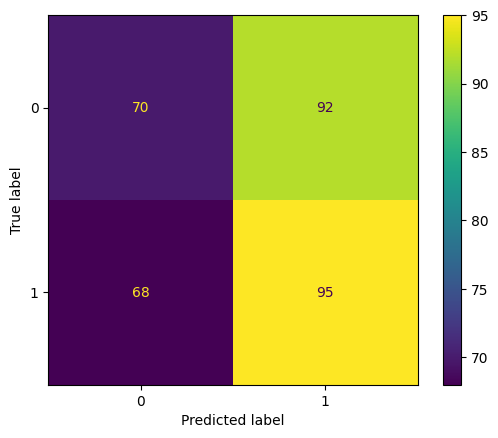

In [319]:
from sklearn import metrics
import matplotlib.pyplot as plt

# confusion matrix for indoor model
confusion_matrix = metrics.confusion_matrix(indoor_y_test, indoor_y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show() 

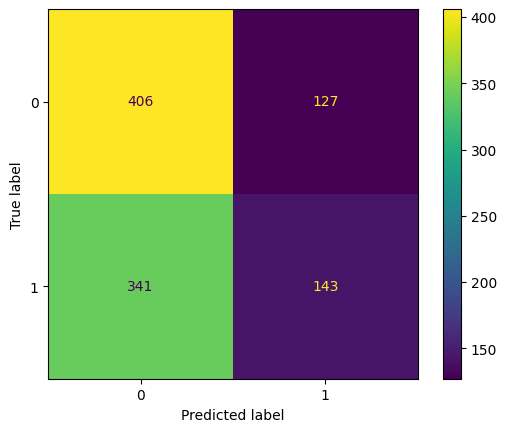

In [320]:
# confusion matrix for acclimatised model
confusion_matrix = metrics.confusion_matrix(outdoor_with_acclimatisation_y_test, outdoor_with_acclimatisation_y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show() 

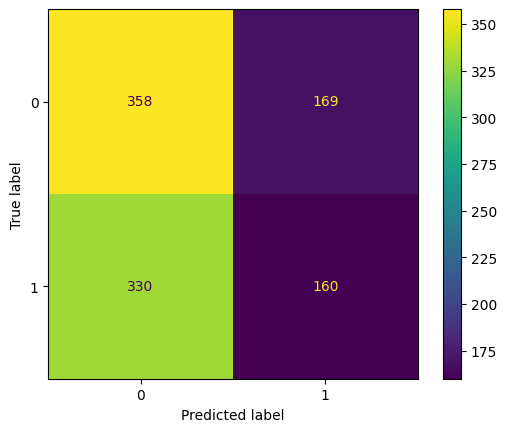

In [321]:
# confusion matrix for non-acclimatised model
confusion_matrix = metrics.confusion_matrix(outdoor_without_acclimatisation_y_test, outdoor_without_acclimatisation_y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show() 

In [337]:
import random
for i in range(10):

# creating a new game and testing if it went over the total-line

    new_game = [[
        random.randint(1,32),#away_team
        random.randint(1,32),#home_team
        0,#location
        outdoor_df['home_winning_margin'].median(),#home_winning_margin
        0,#overtime
        7,#away_rest
        7,#home_rest
        outdoor_df['away_moneyline'].median(),#away_moneyline
        outdoor_df['home_moneyline'].median(),#home_moneyline
        outdoor_df['spread_line'].median(),#spread_line
        outdoor_df['away_spread_odds'].median(),#away_spread_odds
        outdoor_df['home_spread_odds'].median(),#home_spread_odds
        31,#total_line
        outdoor_df['under_odds'].median(),#under_odds
        outdoor_df['over_odds'].median(),#over_odds
        outdoor_df['temp'].median(),#temp
        outdoor_df['wind'].median(),#wind
        random.randint(0,1),#div_game
        random.randint(0,1),#home_win
        1,#home_spread_win
        4,#home_spread_winning_margin
        0.5,#home_team_win_perecentage
        0.5,#away_team_win_perecentage
        random.randrange(9,12),#month_number
        outdoor_df['homeAcclimatisedTemp'].median(),#homeAcclimatisedTemp
        outdoor_df['awayAcclimatisedTemp'].median(),#awayAcclimatisedTemp
        outdoor_df['home_acclimatisation_advantage'].median(),#home_acclimatisation_advantage
        1,#home_acclimatisation_category
        3,#away_acclimatisation_category
        outdoor_df['acclimatisation_category_difference'].median()#acclimatisation_category_difference
    ]]

    new_game_with_scaling = scaler.transform(new_game)
    prediction = outdoor_with_acclimatisation_model.predict(new_game_with_scaling)

    if prediction ==1:
        print("Over")
    else:
        print("Under")

Under
Under
Under
Over
Under
Over
Under
Under
Under
Under


C:\Users\Mark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Mark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Mark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Mark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning:

In [344]:
from sklearn.naive_bayes import GaussianNB

# testing accuracy of Gaussian model
gaussianModel = GaussianNB()
gaussianModel.fit(outdoor_with_acclimatisation_X_train, outdoor_with_acclimatisation_y_train)
print(gaussianModel.score(outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_test))

0.5365388397246804


In [339]:
from sklearn.neighbors import KNeighborsClassifier

# testing accuracy of KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(outdoor_with_acclimatisation_X_train, outdoor_with_acclimatisation_y_train)

print(knn.score(outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_test))

0.5309734513274337


In [340]:
from sklearn import svm
# testing accuracy of support vector machine model
vector_clf = svm.SVC(kernel='linear') 

vector_clf.fit(outdoor_with_acclimatisation_X_train, outdoor_with_acclimatisation_y_train)

print(vector_clf.score(outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_test))

0.5339233038348082


In [341]:
from sklearn.tree import DecisionTreeClassifier
# testing accuracy of decision tree model
tree_clf = DecisionTreeClassifier()

tree_clf.fit(outdoor_with_acclimatisation_X_train, outdoor_with_acclimatisation_y_train)

print(tree_clf.score(outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_test))

0.5309734513274337


In [343]:
print(tabulate(
    [
        ['Logistic regression', 
         round(outdoor_with_acclimatisation_model.score(outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_test)*100, 1)],

        ['Gaussian', 
         round(gaussianModel.score(outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_test)*100, 1)],

         ['K Nearest Neighbours',
          round(knn.score(outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_test)*100, 1)],

          ['Support Vector Machine',
           round(vector_clf.score(outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_test)*100, 1)], 

        ['Decision tree',
           round(tree_clf.score(outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_test)*100, 1)], 

         ], headers=['Model', 'Score'], tablefmt='grid'
))

+------------------------+---------+
| Model                  |   Score |
+========================+=========+
| Logistic regression    |    54   |
+------------------------+---------+
| Gaussian               |    53.7 |
+------------------------+---------+
| K Nearest Neighbours   |    53.1 |
+------------------------+---------+
| Support Vector Machine |    53.4 |
+------------------------+---------+
| Decision tree          |    53.1 |
+------------------------+---------+
